<a href="https://colab.research.google.com/github/HasiniSandunika/cancer-detection-with-cnn/blob/master/lstm_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
from numpy import array
import re
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas import read_csv
from keras.models import load_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [124]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		x.append(seq_x)
		y.append(seq_y)
	return array(x), array(y)

In [125]:
# define model
def define_model(n_steps, n_features):
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
  model.add(Dense(1))
  return model

In [126]:
# compile model for local cases
def compile_model_local(x,y,model):
  model.compile(optimizer='adam', loss='mse')
  model.save("/content/drive/My Drive/lstm-time series-DM/local cases/local_model.h5") 
  return model.fit(x, y, epochs=200, verbose=0)

In [127]:
# compile model for global cases
def compile_model_global(x,y,model):
  model.compile(optimizer='adam', loss='mse')
  model.save("/content/drive/My Drive/lstm-time series-DM/global cases/global_model.h5") 
  return model.fit(x, y, epochs=200, verbose=0)

In [128]:
# train global model
def train_global():
	df_glob = read_csv('/content/drive/My Drive/lstm-time series-DM/global cases/global_covid19_dataset.csv')
	raw_seq_glob = df_glob.cases.to_numpy() 
	n_steps = 3
	n_features = 1
	x, y = split_sequence(raw_seq_glob, n_steps)	
	x = x.reshape((x.shape[0], x.shape[1], n_features))
	model=compile_model_global(x,y, define_model(n_steps, n_features))
	print("Epochs vs Loss graph for global cases")
	plt.figure() 
	plt.xlabel('Epochs') 
	plt.ylabel('Loss') 
	plt.plot(model.history['loss']) 
	plt.legend(['Training'])
	plt.show()

In [129]:
# test global model
def test_global(glo_t1,glo_t2,glo_t3):
    model = load_model("/content/drive/My Drive/lstm-time series-DM/global cases/global_model.h5")
    x_input = array([glo_t1,glo_t2,glo_t3])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print("Predicted value for input global cases:", str(yhat[0][0]))

In [130]:
# train local model
def train_local():
  df_loc = read_csv('/content/drive/My Drive/lstm-time series-DM/local cases/local_covid19_dataset.csv')
  raw_seq_loc = df_loc.cases.to_numpy() #specify dataset
  n_steps = 3
  n_features = 1
  x, y = split_sequence(raw_seq_loc, n_steps)
  x = x.reshape((x.shape[0], x.shape[1], n_features))
  model=compile_model_local(x,y, define_model(n_steps, n_features))
  print("Epochs vs Loss graph for local cases")
  plt.figure() 
  plt.xlabel('Epochs') 
  plt.ylabel('Loss') 
  plt.plot(model.history['loss']) 
  plt.legend(['Training'])
  plt.show()

In [131]:
# test local model
def test_local(loc_t1,loc_t2,loc_t3):
  model = load_model("/content/drive/My Drive/lstm-time series-DM/local cases/local_model.h5")
  x_input = array([loc_t1, loc_t2, loc_t3])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  print("Predicted value for input local cases:", str(yhat[0][0]))

Epochs vs Loss graph for global cases


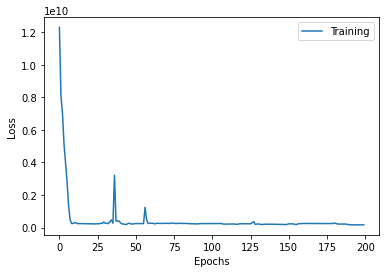

Epochs vs Loss graph for local cases


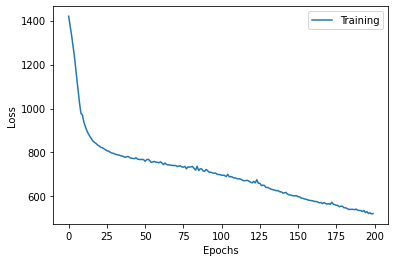

Predicted value for input local cases: 0.50849324


In [132]:
#@title Main application
def main():  
  train_global()
  train_local()
  select_cases ='local' #@param ["global", "local"]
  reported_cases_on_day_one =  6#@param {type:"number"}
  reported_cases_on_day_two =  43#@param {type:"number"}
  reported_cases_on_day_three =  2#@param {type:"number"}
  if select_cases=='global':
    test_global(reported_cases_on_day_one, reported_cases_on_day_two, reported_cases_on_day_three)
  else:
    test_local(reported_cases_on_day_one, reported_cases_on_day_two, reported_cases_on_day_three)
if __name__ == "__main__":
        main()